                                                        RED WINE QUALITY

Data Pre-Processing

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Reading the dataset
dataset=pd.read_csv('/content/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#No of rows and columns in the dataset
dataset.shape

(1599, 12)

In [4]:
# Checking the overall information on the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Checking for missing values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# No of unique values present in the dataframe
dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Data Analysis and Visualization

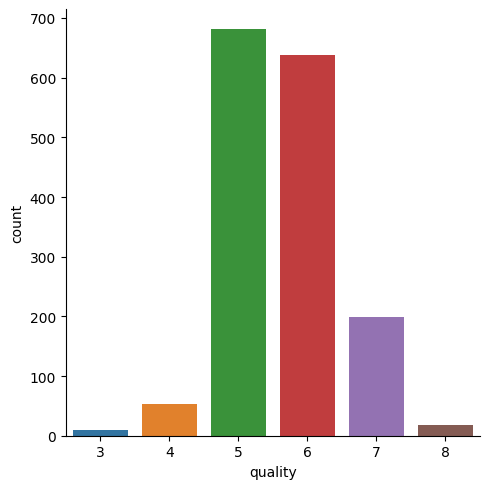

In [8]:
#Number of Wines in each category of quality rating
sns.catplot(x='quality',data=dataset,kind='count');

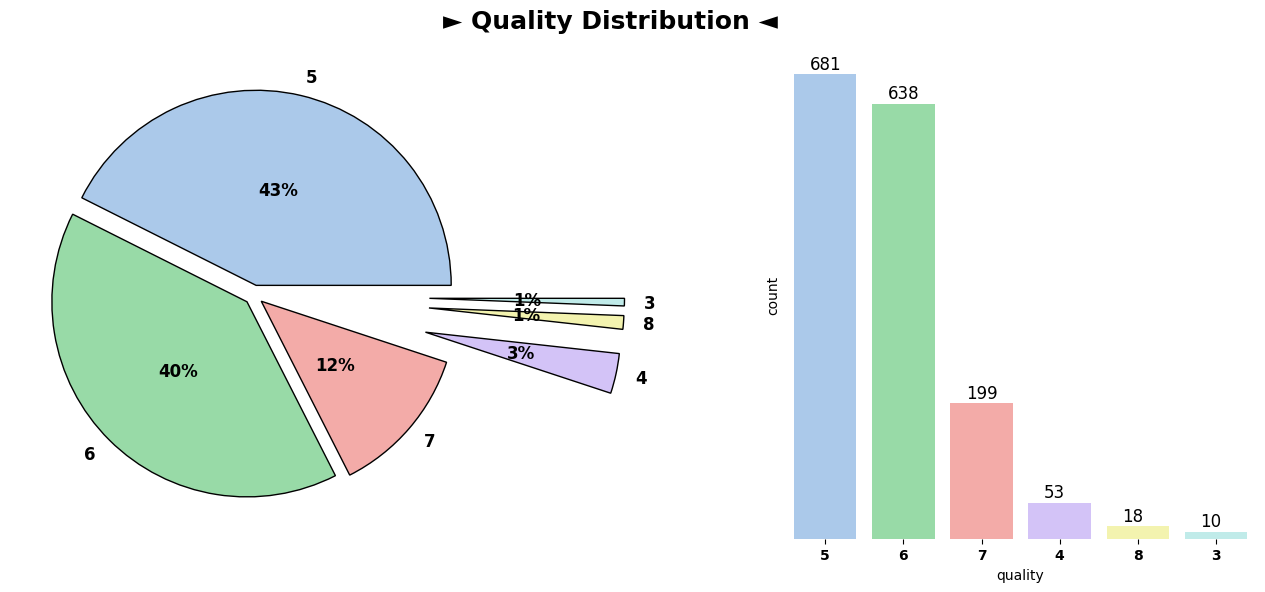

In [9]:
#Distribution of Quality
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
ax[0].pie(dataset["quality"].value_counts().to_list(),
        colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"],
        labels=dataset["quality"].value_counts().index.to_list(),
        autopct='%1.f%%',
        explode=([.05]*3 +[.9,.9,.9]),
        pctdistance=0.5,
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'},
        textprops=textprops)

sns.countplot(x = "quality", data=dataset, palette = "pastel6", order=dataset["quality"].value_counts().to_dict().keys())
for p, count in enumerate(dataset["quality"].value_counts().to_dict().values(),0):
    ax[1].text(p-0.2, count + 8, count, color='black', fontsize=12)
plt.setp(ax[1].get_xticklabels(), fontweight="bold")
plt.yticks([])
plt.box(False)
fig.suptitle(x=0.56, t=f'► Quality Distribution ◄', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

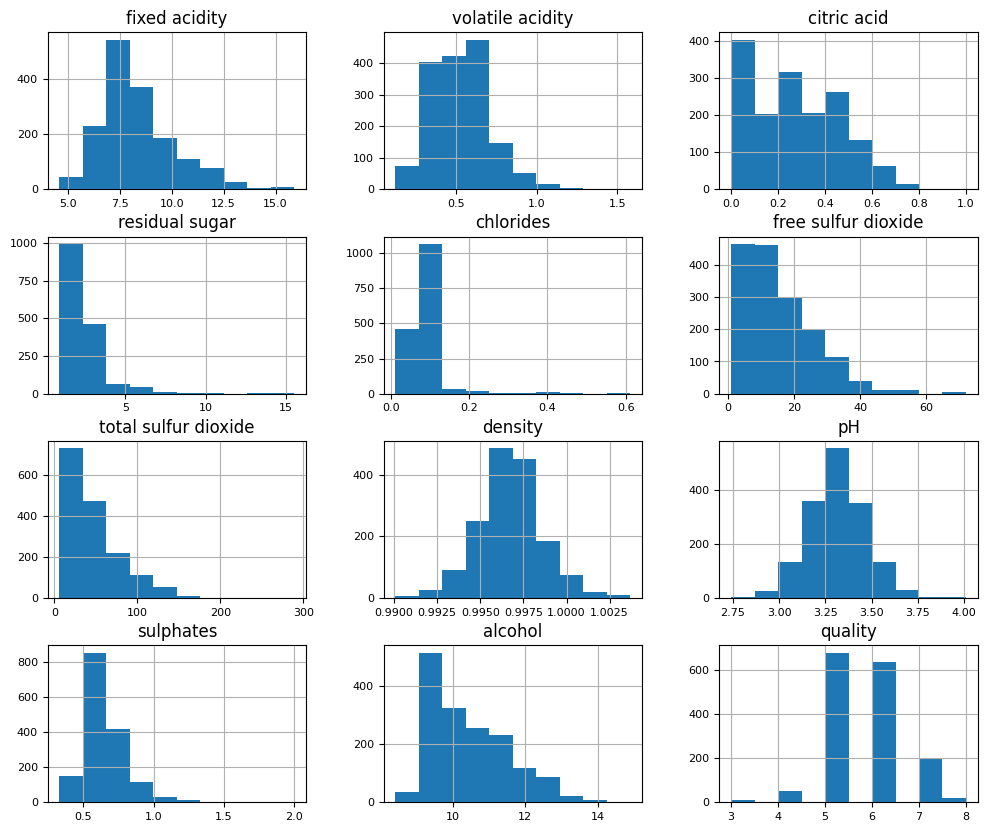

In [10]:
#Histogram of the dataset
dataset.hist(figsize=(12,10),xlabelsize=8,ylabelsize=8)
plt.show()

In [11]:
#Creating a Correlation
correlation=dataset.corr()

<Axes: >

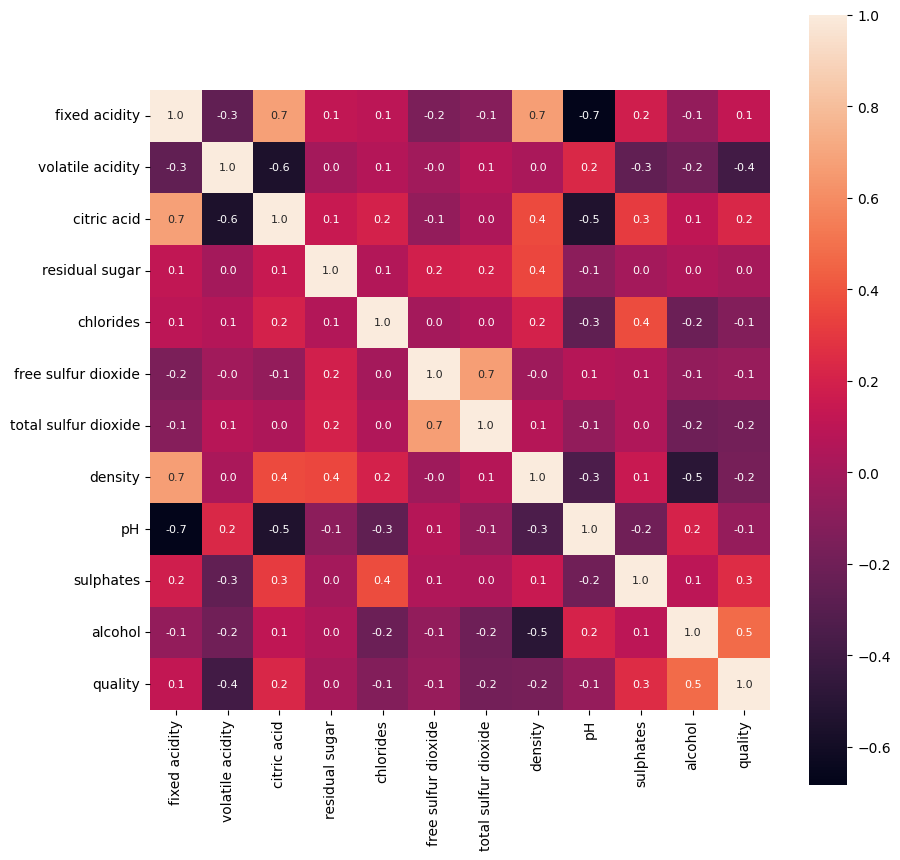

In [12]:
#Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [13]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We can observe that, the 'alcohol, sulphates, citric_acid,fixed_acidity & residual_sugar' have maximum corelation with response variable 'quality'.
This means that, they need to be further analysed for detailed pattern and corelation exploration.

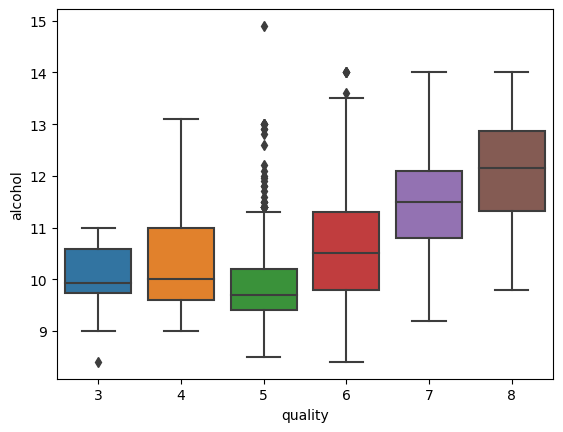

In [14]:
#Alcohol presence in different quality wines
a=sns.boxplot(x='quality',y='alcohol',data=dataset)

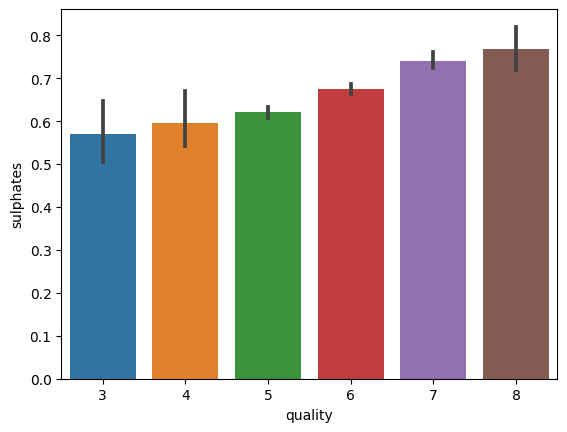

In [15]:
#Sulphates presence in different quality wines
b = sns.barplot(x="quality", y='sulphates', data = dataset)

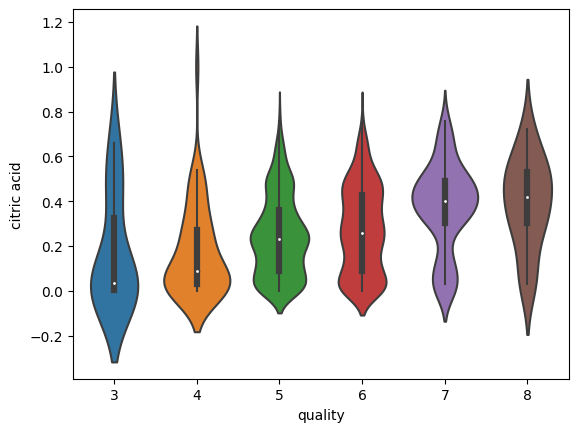

In [16]:
#Citric_acid presence in different quality wines
c = sns.violinplot(x="quality", y='citric acid', data = dataset)

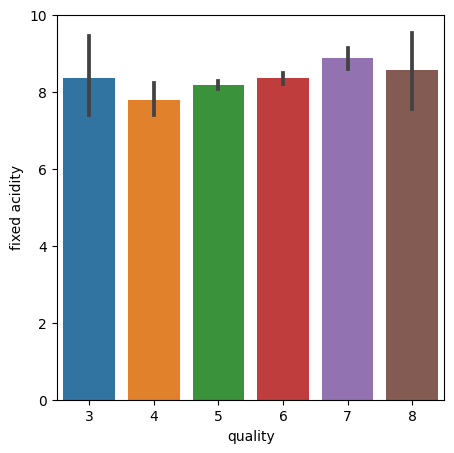

In [17]:
#Fixed Acidity presence in different quality wines
plot=plt.figure(figsize=(5,5))
d=sns.barplot(x='quality',y='fixed acidity',data=dataset)

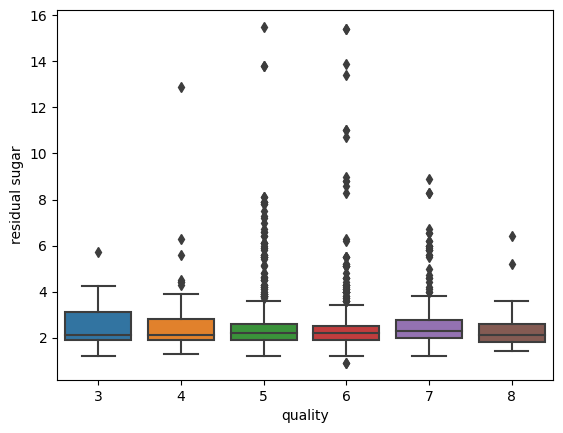

In [18]:
#Residual Sugar  presence in different qulity wines
e = sns.boxplot(x="quality", y="residual sugar", data = dataset);

<Axes: xlabel='quality', ylabel='count'>

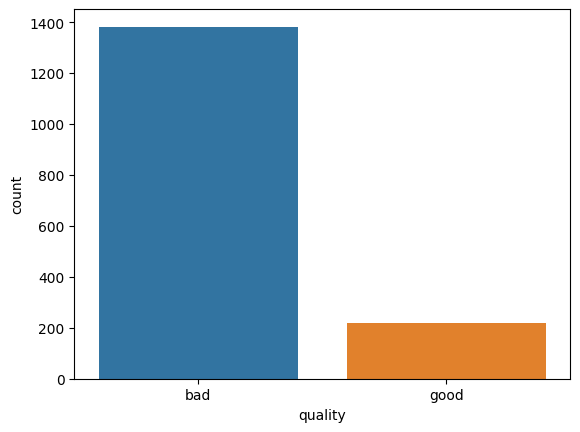

In [19]:
# Separating the quality of red wine into three different groups
f= dataset.copy()
f['quality'].replace([3,4,5,6],['bad','bad','bad','bad'],inplace=True)
f['quality'].replace([7,8],['good','good'],inplace=True)
sns.countplot(x=f['quality'])

In [20]:
#Separate the data and label
X=dataset.drop('quality',axis=1)

In [21]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [22]:
Y=dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training:
Random Forest Classifier

In [26]:
model=RandomForestClassifier()

In [27]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [28]:
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.925


Building a Predictive System

In [30]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the data as we are predicting the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
